In [1]:
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore
import plotly.graph_objs as go

In [2]:
# load data

In [3]:
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# standardize data

In [5]:
standart_data = zscore(data.data)
df_standart = pd.DataFrame(standart_data, columns=data.feature_names)
df_standart.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [6]:
# dendrogram

In [7]:
link = linkage(df_standart, method='ward', metric='euclidean')

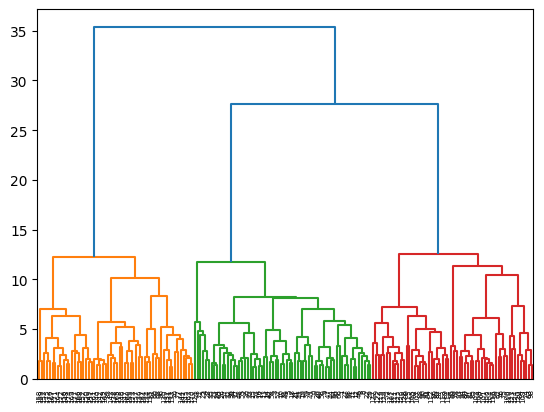

In [8]:
clusters = dendrogram(link)

##On the dendrogram we can see 3 clusters, which represent from target. 

____

In [9]:
k_means = KMeans(n_clusters=3, random_state = 42)

In [10]:
k_means.fit(df_standart)

C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
clusters_data = k_means.labels_

C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

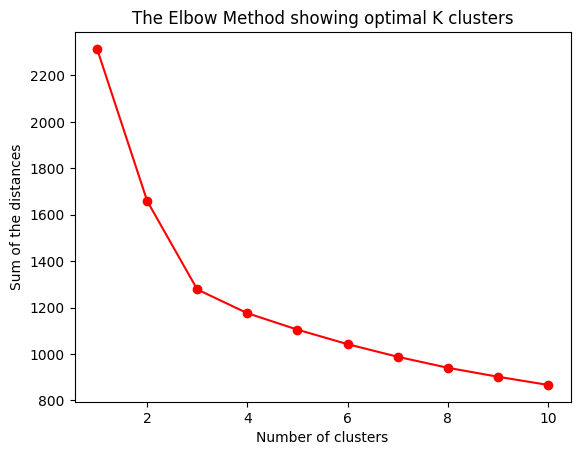

In [12]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state = 42).fit(df_standart) for k in K]
distance = [model.inertia_ for model in models]

plt.plot(K, distance, marker = 'o', color = 'red')
plt.title('The Elbow Method showing optimal K clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of the distances')
plt.show()

###the number of selected clusters is correct

In [13]:
test_ = [[1.618613, -0.562250, 0.292053, -1.189593, 1.913905, 0.808997, 0.246290, -0.499413, -0.827996, -2.490847, 0.018145, 0.668648, 0.733629]]
k_means.predict(test_)

C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [14]:
### vizualizate data
### choose most important features

In [45]:
import seaborn as sns

<AxesSubplot: >

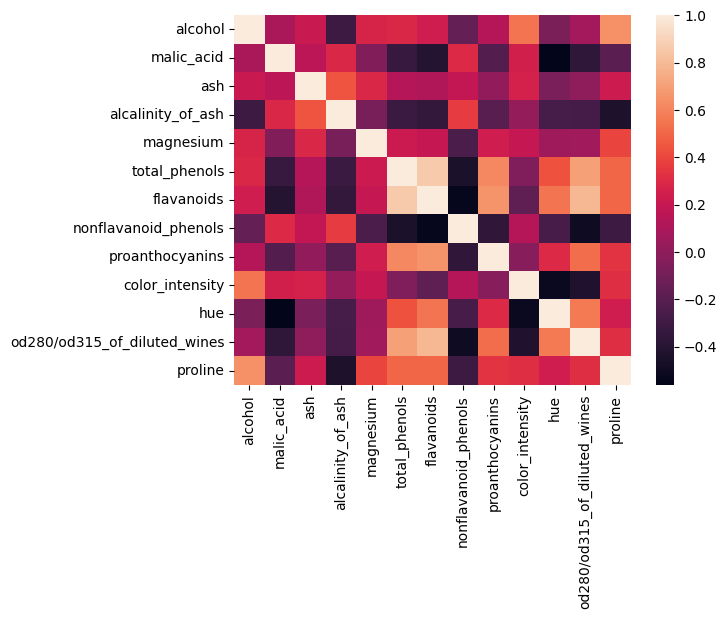

In [46]:
sns.heatmap(df_standart.corr())

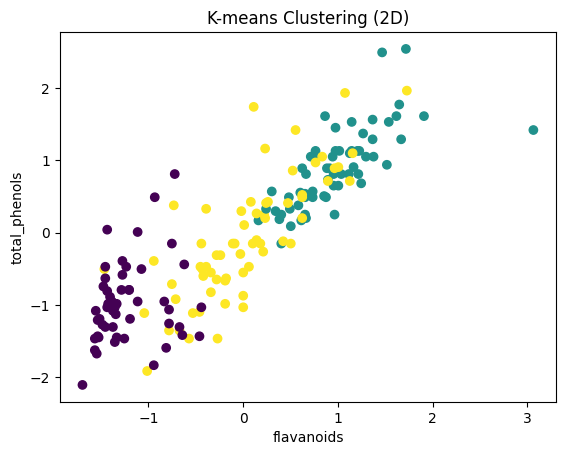

In [47]:
plt.scatter(df_standart['flavanoids'], df_standart['total_phenols'], c=k_means.labels_)
plt.title('K-means Clustering (2D)')
plt.xlabel('flavanoids')
plt.ylabel('total_phenols')
plt.show()

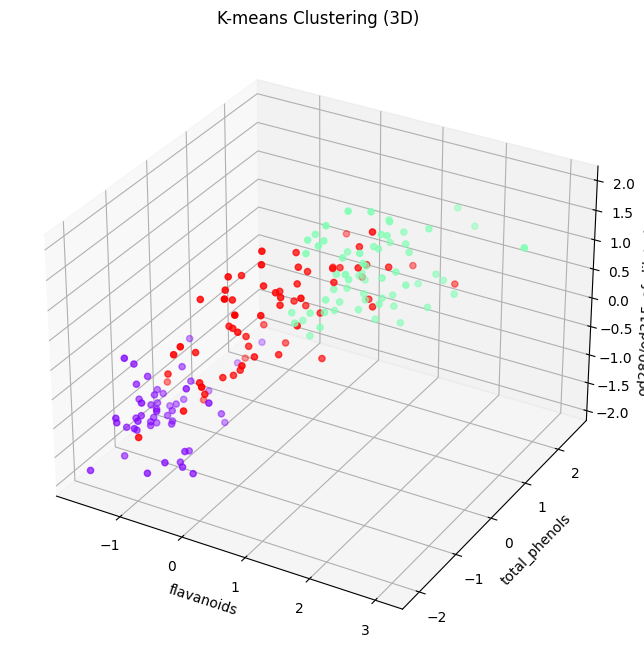

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standart['flavanoids'], df_standart['total_phenols'], df_standart['od280/od315_of_diluted_wines'], c=k_means.labels_, cmap='rainbow')
ax.set_title('K-means Clustering (3D)')
ax.set_xlabel('flavanoids')
ax.set_ylabel('total_phenols')
ax.set_zlabel('od280/od315_of_diluted_wines')
plt.show()

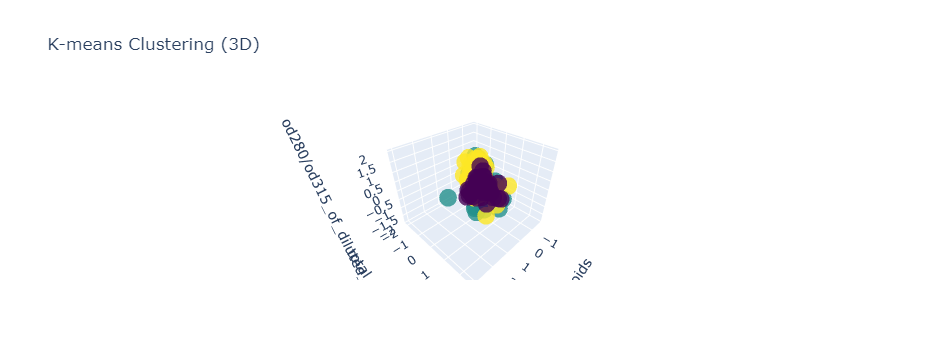

In [49]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_standart['flavanoids'],
    y=df_standart['total_phenols'],
    z=df_standart['od280/od315_of_diluted_wines'],
    mode='markers',
    marker=dict(
        color=k_means.labels_,
        size=10,
        opacity=0.8,
        colorscale='Viridis'
    )
)])

fig.update_layout(title='K-means Clustering (3D)',
                  scene=dict(xaxis_title='flavanoids',
                             yaxis_title='total_phenols',
                             zaxis_title='od280/od315_of_diluted_wines'))

fig.show()

_____